In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

This is a univariate linear regression problem in where we are given the population of cities and the corresponding profit of food trucks in that city as our labelled training data. The goal is to be able to train a model to predict profit based on population using gradient decent.

Text(0.5, 0, 'Population in $10,000s')

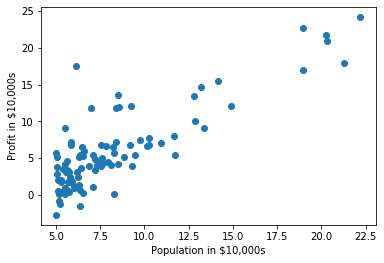

In [4]:
#Load and plot data
data = np.loadtxt("ex1data1.txt", delimiter = ",")
plt.scatter(data[:,0], data[:,1])
plt.ylabel("Profit in $10,000s")
plt.xlabel("Population in $10,000s")

In [5]:
#Vectorizing data

#Strip x and y from data and make them into numpy column vectors
#The -1 in the argument of reshape allows inferencing
x = np.array(data[:,0])
x_column = x.reshape(-1,1)
y = np.array(data[:,1])
Y = y.reshape(-1,1)

#Creating a column of ones to conacatenate with x_column in order to accomodate theta_0 parameter in matrix calculations
ones = np.ones((len(x),1), dtype=float)

#Initializing parameter matrix
theta = np.zeros((2,1), dtype=float)

#Making full feature matrix
X = np.append(ones,x_column,axis=1)

In [6]:
#Initializing hyperparamters
iterations = 1500
alpha = .01

In [7]:
#Calculating cost
n = len(x)
def cost(X,Y,theta):
    J = (sum((np.dot(X,theta)-Y)**2))/(2*n)
    return J

#Here theta is initialized to zeros
print(cost(X,Y,theta))

[32.07273388]


In [8]:
#Calculating gradient
def grad(X,Y,theta):
    gradient = X.T.dot((np.dot(X,theta)-Y))
    return gradient

In [9]:
#Gradient descent
def grad_descent(X,Y,theta,alpha,iterations):
    for i in range(iterations):
        theta = theta - ((alpha/n)*grad(X,Y,theta))
        #print(cost(X,Y,theta))
    return theta

theta = grad_descent(X,Y,theta,alpha,iterations)

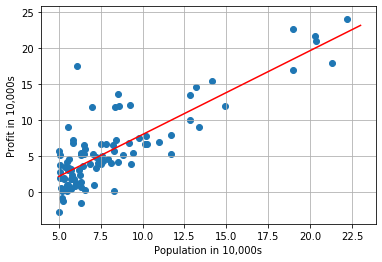

In [10]:
#Plotting solution
x_vals = np.linspace(5,23, n)
y_vals = np.zeros(n)

for i in range(n):
    y_vals[i] = theta[0]+theta[1]*x_vals[i]
    
solution = plt.plot(x_vals,y_vals, "-r")
plt.xlabel("Population in 10,000s")
plt.ylabel("Profit in 10,000s")
plt.grid()
training_data = plt.scatter(data[:,0], data[:,1])
plt.show(solution, training_data)

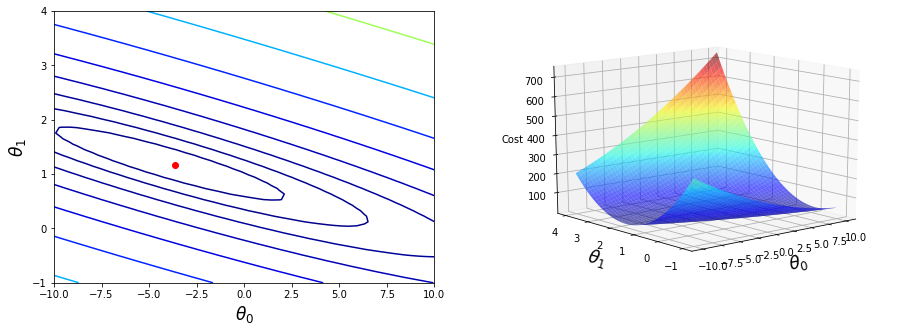

In [11]:
#Visualizing cost function
# Create grid coordinates for plotting
B0 = np.linspace(-10, 10, 50)
B1 = np.linspace(-1, 4, 50)
xx, yy = np.meshgrid(B0, B1, indexing='xy')
Z = np.zeros((B0.size,B1.size))

# Calculate Z-values (Cost) based on grid of coefficients
for (i,j),v in np.ndenumerate(Z):
    Z[i,j] = cost(X,Y, theta=[[xx[i,j]], [yy[i,j]]])

fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

# Left plot
CS = ax1.contour(xx, yy, Z, np.logspace(-2, 3, 20), cmap=plt.cm.jet)
ax1.scatter(theta[0],theta[1], c='r')

# Right plot
ax2.plot_surface(xx, yy, Z, rstride=1, cstride=1, alpha=0.6, cmap=plt.cm.jet)
ax2.set_zlabel('Cost')
ax2.set_zlim(Z.min(),Z.max())
ax2.view_init(elev=15, azim=230)

# settings common to both plots
for ax in fig.axes:
    ax.set_xlabel(r'$\theta_0$', fontsize=17)
    ax.set_ylabel(r'$\theta_1$', fontsize=17)

We now move on to a multivariate (in this case 2 variable) linear regression problem. Given the number of bedrooms of a house as well as its size in square feet we would like to predict its price. This will require some feature normalization to speed up convergence of grafient descent as well as some experimentation with the learning rate.

In [17]:
#Loading data for multivariate problem
data = np.loadtxt("ex1data2.txt", delimiter = ",")
np.shape(data)

(47, 3)

The first column is the size of the house in square feet, the second column is the number of bedrooms, and the third column is the price of the house. These columns vary by several orders of magnitude so we will have to normalize them.

In [20]:
#Calculating the mean and standard deviation of each column
size_mean = np.mean(data[:,0])
rooms_mean = np.mean(data[:,1])
price_mean = np.mean(data[:,2])

size_sd = np.std(data[:,0])
rooms_sd = np.std(data[:,1])
price_sd = np.std(data[:,2])

In [26]:
#Normalizing each column
size_normalized = (data[:,0]-size_mean)/size_sd
rooms_normalized = (data[:,1]-rooms_mean)/rooms_sd
price_normalized = (data[:,2]-price_mean)/price_sd

In [31]:
#Combining normalized columns to form normalized matrix
data_normalized = np.column_stack((size_normalized, rooms_normalized, price_normalized))

In [ ]:
#Defining the multivariate cost function
def mv_cost(, Y, theta):
    cost = 
    return cost